In [1]:
########## LIBRERÍAS A UTILIZAR ##########
import numpy as np
import pandas as pd 

In [2]:
########## IMPORTAMOS LOS DATOS ##########
#Importamos el dataset para iniciar el análisis
iris = pd.read_csv("Iris.csv")
#Visualizamos los primeros 5 datos del dataset
print(iris.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
#Eliminamos la primera columna ID
iris = iris.drop('Id',axis=1)
print(iris.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
########## ANALIZAMOS LOS DATOS ##########
#Análizamos los datos que tenemos disponibles
print('Información del dataset:')
print(iris.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


In [5]:
print('Descripción del dataset:')
print(iris.describe())


Descripción del dataset:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [6]:
print('Distribución de las especies de Iris:')
print(iris.groupby('Species').size())

Distribución de las especies de Iris:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [7]:
########## VISUALIZAMOS LOS DATOS ##########
import matplotlib.pyplot as plt
#Grafico Sepal - Longitud vs Ancho
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', 
          x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', 
    x='SepalLengthCm', y='SepalWidthCm', color='green', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', 
    x='SepalLengthCm', y='SepalWidthCm', color='red', label='Virginica', ax=fig)
fig.set_xlabel('Sépalo - Longitud')
fig.set_ylabel('Sépalo - Ancho')
fig.set_title('Sépalo - Longitud vs Ancho')
plt.show()



<Figure size 640x480 with 1 Axes>

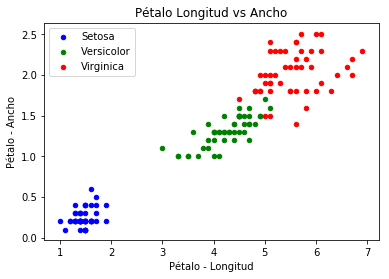

In [8]:
#Grafico Pétalo - Longitud vs Ancho
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', 
          x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', 
    x='PetalLengthCm', y='PetalWidthCm', color='green', 
    label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', 
    x='PetalLengthCm', y='PetalWidthCm', color='red', label='Virginica', ax=fig)
fig.set_xlabel('Pétalo - Longitud')
fig.set_ylabel('Pétalo - Ancho')
fig.set_title('Pétalo Longitud vs Ancho')
plt.show()

In [9]:
########## APLICACIÓN DE ALGORITMOS DE MACHINE LEARNING ##########
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [10]:
##################################################################
########## MODELO CON TODOS LOS DATOS
#Separo todos los datos con las características y las etiquetas o resultados
X = np.array(iris.drop(['Species'], 1))
y = np.array(iris['Species'])

In [11]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 120 datos para entrenamiento y 30 datos para prueba


In [12]:
#Modelo de Regresión Logística
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Regresión Logística: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Regresión Logística: 0.95


C:\Users\Jonathan B M\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jonathan B M\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [13]:
#Modelo de Máquinas de Vectores de Soporte
algoritmo = SVC()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Máquinas de Vectores de Soporte: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Máquinas de Vectores de Soporte: 0.9833333333333333


C:\Users\Jonathan B M\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [14]:
#Modelo de Vecinos más Cercanos
algoritmo = KNeighborsClassifier(n_neighbors=5)
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Vecinos más Cercanos: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Vecinos más Cercanos: 0.9583333333333334


In [15]:
#Modelo de Árboles de Decisión Clasificación
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Árboles de Decisión Clasificación: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Árboles de Decisión Clasificación: 1.0
